# PA 2: Classification - Nearest Neighbors

## Student Details

Notes: When submitting, fill your name and ID in this cell. [1 point]

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions


Step 5: Rename this submission file as 'yourLastName_Last4digitsofyourID_NN.ipynb' [1 point]

Step 6: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

## Programming Assignment Details



For this assignment use Jupyter notebook, Panda, and scikit.

1) Load iris dataset from sklearn datasets. [0 points]


2) Split your dataset 70% for training, and 30% for testing the classifier. [0 points]


3) Select only 2 attributes for training and testing your model. [2 points]


4) Use Euclidean distance. [1 points]


5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]


6) Use comments to explain your code and variable names.[2 points]


7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]


8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

## Report

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:


1) Describe the Nearest Neighbors method, [3 points]


2) Explain what was your criteria for selecting the two attributes, [4 points]


3) Visualizations of the classifier in a 2D projection, for all three different number of neighbors,[4 points]


4) Interprete and compare the results.[4 points]

Do not to forget to cite your sources!


Step 7: Save your report file as 'yourLastName_Last4digitsofyourID_NN.doc' [1 point]

Step 8: Place this file inside the folder 'PA#2_Classification_yourLastName' [1 point]

Step 9: Submit your zipped folder (PA#2_Classification_yourLastName.zip) on Canvas

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets , metrics   
from sklearn.metrics import confusion_matrix
from sklearn import tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pydotplus

1) Load iris dataset from sklearn datasets. [0 points]

In [11]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

2) Split your dataset 70% for training, and 30% for testing the classifier. [0 points]

In [12]:
# splitting dataset for 70% training and 30% testing. x_train contains the data our model will use for training 
# and x_test contains data for testing. y_train conatins target variable for training and y_test set of target 
# variables for testing.

x , y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

3) Select only 2 attributes for training and testing your model. [2 points]

In [13]:
# Performing chi2 test to select best 2 feature

sel_chi2 = SelectKBest(chi2, k=2)    # select 2 features
X_train_chi2 = sel_chi2.fit_transform(x_train, y_train)
x_train = sel_chi2.transform(x_train)
x_test = sel_chi2.transform(x_test)

4) Use Euclidean distance. [1 points]

5) Test the classifier with three diferent numbers for neighbors and record the results. [3 points]

7) Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]

In [14]:
# KNN for 1 neighbors

knn_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_1.fit(x_train, y_train)
y_pred_1 = knn_1.predict(x_test)
print(confusion_matrix(y_test,y_pred_1))
print(metrics.classification_report(y_test, y_pred_1))


# KNN for 5 neighbors

knn_2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_2.fit(x_train, y_train)
y_pred_2 = knn_2.predict(x_test)
print(confusion_matrix(y_test,y_pred_2))
print(metrics.classification_report(y_test, y_pred_2))


# KNN for 20 neighbors

knn_3 = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn_3.fit(x_train, y_train)
y_pred_3 = knn_3.predict(x_test)
print(confusion_matrix(y_test,y_pred_3))
print(metrics.classification_report(y_test, y_pred_3))

[[18  0  0]
 [ 0 13  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 13  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.87      0.93        15
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

[[18  0  0]
 [ 0 14  1]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1      

8) Plot the classifier in a 2D projection for all three different numbers.[6 points]

In [15]:
# Function to plot decision region of KNN classifier

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                    marker=markers[idx], label=cl)

KNN Plot for 1 neighbor


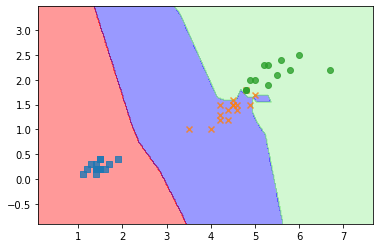

In [16]:
print("KNN Plot for 1 neighbor")
plot_decision_regions(x_test, y_test, knn_1)

KNN Plot for 5 neighbor


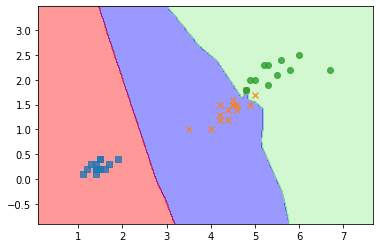

In [17]:
print("KNN Plot for 5 neighbor")
plot_decision_regions(x_test, y_test, knn_2)

KNN Plot for 20 neighbor


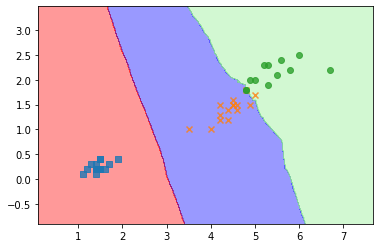

In [18]:
print("KNN Plot for 20 neighbor")
plot_decision_regions(x_test, y_test, knn_3)

## Sources

https://www.kaggle.com/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset

https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning